In [60]:
import json
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [65]:
dataset = {}
df_dataset = {}
data_path = Path('/Users/jtang/Workspace/SBIRNext_dataset/output')
for f_path in data_path.glob('*Vol3*'):
    if f_path.is_file:
        #print(f_path)
        with open(f_path, 'r') as f:
            #print(dir(f))
            #print(f.read().decode('utf-8'))
            dataset[str(f_path)] = json.loads(f.read())
            df_dataset[str(f_path)] = pd.read_json(f_path)

In [66]:
df_dataset = {}
data_path = Path('/Users/jtang/Workspace/SBIRNext_dataset/output')
for f_path in data_path.glob('*Vol3*'):
    if f_path.is_file:
        #print(f_path)
        with open(f_path, 'r') as f:
            #print(dir(f))
            #print(f.read().decode('utf-8'))
            json_data = json.loads(f.read())
            df_dataset[str(f_path)] = pd.json_normalize(json_data)

In [75]:
dataset['/Users/jtang/Workspace/SBIRNext_dataset/output/F2D-0322_Vol3-proposalBudget.json']['profit_rate']

{'Year2': {'header': '',
  'cost_sharing': '-0',
  'cost_sharing_explanation': '',
  'profit_rate': '2',
  'profit_explanation': '',
  'total_profit_cost': '19,607.81',
  'total_proposed_amount': '999,998.5'},
 'Base': {'cost_sharing': '-0',
  'cost_sharing_explanation': '',
  'profit_rate': '2',
  'profit_explanation': '',
  'total_profit_cost': '19,607.81'}}

In [96]:
proposed_amounts = {'total_proposed_amount': [], 'project': []}
for key, vol in dataset.items():
    #print(key)
    if 'profit_rate' in vol:
        for year, leaves in vol['profit_rate'].items():
            if 'total_proposed_amount' in leaves:
                proposed_amounts['total_proposed_amount'].append(leaves['total_proposed_amount'])
                proposed_amounts['project'].append(key.split('/')[-1])
        

In [107]:
proposed = pd.DataFrame.from_dict(proposed_amounts)

<AxesSubplot:xlabel='project', ylabel='total_proposed_amount'>

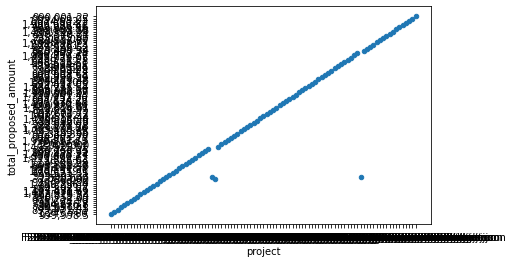

In [108]:
proposed.plot.scatter(x='project', y='total_proposed_amount')